# DCS 630 Predictive Analytics
## Bellevue University
## 1.2 Assignment: R/Python Refresher
## Author: Gyan Kannur
## Date: 09/03/2025

## Assignment Instructions:
This assignment is a refresher of data analysis and visualization using Python and/or R. Find a data set that interests you and has appropriate data to create some interesting visualizations. A few good sources for finding datasets include Kaggle, UCI ML Repository, and the US Bureau of Labor Statistics.
With the dataset that you choose, perform the following steps using Python and/or R:<br>

<ol>
    <li> Write a summary of your data and identify at least two questions to explore visually with your data.
    <li> Create a histogram or bar graph from your data.
    <li> Create a boxplot from your data.
    <li> Create a bivariate plot from your data.
    <li> Create any additional visualizations that will help to answer the question(s) you want to answer.
    <li> Summarize your results and make a conclusion. Explain how you arrived at this conclusion and how your visualizations support your conclusion.
<ol>

Link to the dataset for the assignment is provided below: <br>
[Student_Mental Health_Analysis](https://www.kaggle.com/datasets/shariful07/student-mental-health?resource=download)

In [74]:
'''
Import the necessary libraries to complete Exercise 1.2.
'''
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

In [75]:
'''
Check the versions of the packages.
'''
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib version: 3.9.1


## 1. Dataset summary and exploratory questions.

### Summary of data:
The dataset utilized for this assignment focuses on the mental health of students. There are 11 features and 101 rows within this dataset. The features include time, gender, age, course type, year of study, cummulative grade point average (CGPA), marital status, depression status, anxiety status, panic attacks, and specialist treatment status. This data was obtained via Google forms survey from University students. This dataset was obtained from Kaggle courtesy of MD Shariful Islam. 

### Exploratory Questions:
<ul>
    <li> Does gender have any influence on mental health issues?
    <li> Does age have any influence on mental health issues?
    <li> Does the number of years in college have any influence on mental health issues?
    <li> Does being married have any influence on mental health issues?
    <li> Do individuals with depression also have anxiety and/or panic attacks?
    <li> How many individuals with depression are seeking treatment?
<ul>

In [76]:
'''
Import the dataset.
Note: A copy of the CSV file was placed into the same directory as this notebook.
Utilize pd.read_csv() to read the file as a pandas data frame.
'''
df = pd.read_csv('./assignment-datasets/Student_Mental_Health.csv')

In [77]:
'''
Use head() function to display the first 10 rows of data of df.
'''
df.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [78]:
'''
Understand the shape of the dataset.
'''
print('There are {} rows and {} columns in this dataset.'.format(df.shape[0], df.shape[1]))

There are 101 rows and 11 columns in this dataset.


In [79]:
'''
Display the total size of this dataset.
'''
print('This dataset contains {} records.'.format(df.size))

This dataset contains 1111 records.


In [80]:
'''
Find the type of data within each column initially.
'''
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [81]:
'''
Understand if there are any missing values in the dataset.
'''
df.isna().sum().sort_values(ascending = False)

Age                                             1
Timestamp                                       0
Choose your gender                              0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [82]:
'''
Understand how many missing values are in the dataset initially.
'''
df.isna().sum().sum()

1

In [83]:
'''
Understand how many unique values are within each feature.
'''
df.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [84]:
'''
Summarize the findings above with info().
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

### Observations for Dataset Summary: 
<ul>
    <li> The column names will need to be simplified.
    <li> There is one missing value in the Age column.
    <li> The Timestamp column will not be value added within this dataset.
    <li> Only numeric feature is Age. All other features are categorical.
    <li> The column for number of years in school looks to have 7 categories even though there seems to only be years 1-4. This will need to be resolved to consider the current year of study in the analysis.
    <li> The dataset will need some cleaning prior to the next phase.
<ul>

In [85]:
'''
Rename the columns with simplified headers.
'''
column_names = ['timestamp', 'gender', 'age', 'course', 'year_of_study', 'cgpa',
               'married', 'depressed', 'anxiety', 'panic_attacks', 'seek_treatment']

df.columns = column_names
df.head(10)

,timestamp,gender,age,course,year_of_study,cgpa,married,depressed,anxiety,panic_attacks,seek_treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [86]:
'''
Fill the missing value in the Age column with the median age value.
Show there are no  missing values in the dataset.
'''
median_age = df['age'].median()
df['age'].fillna(median_age, inplace = True)
df.isna().sum().sum()

C:\Users\gyanr\AppData\Local\Temp\ipykernel_23404\1259084987.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace = True)


0

In [87]:
'''
Remove the timestamp column from the dataset.
'''
df.drop('timestamp', axis = 1, inplace = True)
df.head(10)

,gender,age,course,year_of_study,cgpa,married,depressed,anxiety,panic_attacks,seek_treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [88]:
'''
Clean-up the various ways year_of_study values are entered for years 1-4.
'''
dict_replace = {'Year 1': '1', 'year 1': '1','Year 2': '2', 'year 2': '2',
               'Year 3': '3', 'year 3': '3', 'Year 4': '4', 'year 4': '4'}

df['year_of_study'].replace(dict_replace, inplace = True)
df.head(10)

C:\Users\gyanr\AppData\Local\Temp\ipykernel_23404\440866929.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year_of_study'].replace(dict_replace, inplace = True)


,gender,age,course,year_of_study,cgpa,married,depressed,anxiety,panic_attacks,seek_treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
5,Male,19.0,Engineering,2,3.50 - 4.00,No,No,No,Yes,No
6,Female,23.0,Pendidikan islam,2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,Female,18.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
8,Female,19.0,Human Resources,2,2.50 - 2.99,No,No,No,No,No
9,Male,18.0,Irkhs,1,3.50 - 4.00,No,No,Yes,Yes,No


In [89]:
'''
Summarize the cleaned dataset with info()
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          101 non-null    object 
 1   age             101 non-null    float64
 2   course          101 non-null    object 
 3   year_of_study   101 non-null    object 
 4   cgpa            101 non-null    object 
 5   married         101 non-null    object 
 6   depressed       101 non-null    object 
 7   anxiety         101 non-null    object 
 8   panic_attacks   101 non-null    object 
 9   seek_treatment  101 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.0+ KB


### 2. Create a histogram or bargraph from your data.

(array([32., 22.,  6.,  3.,  2., 13., 23.]),
 array([18.        , 18.85714286, 19.71428571, 20.57142857, 21.42857143,
        22.28571429, 23.14285714, 24.        ]),
 <BarContainer object of 7 artists>)

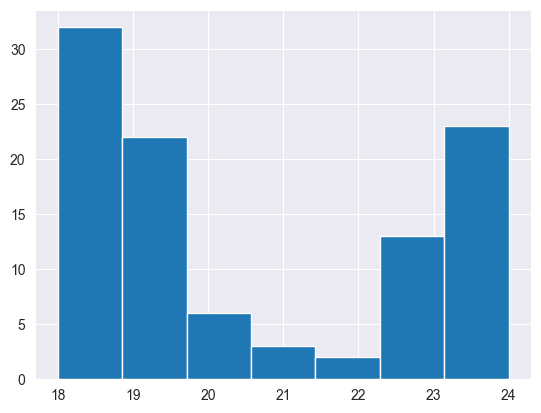

In [90]:
'''
Create a histogram for the only numeric data in the dataset 'age'. 
This will not be very beneficial, but I will create the histogram to show the code.
'''
plt.hist(df['age'], bins = 7)

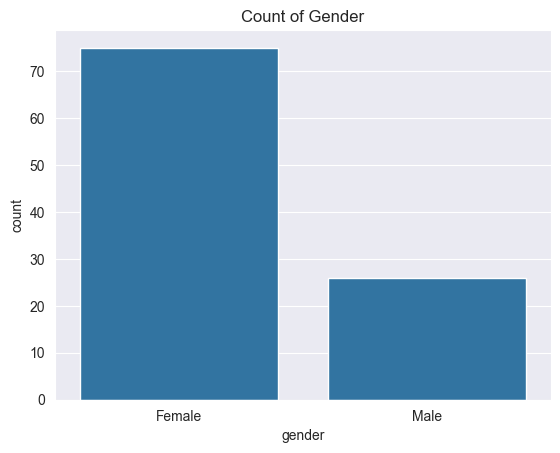

In [91]:
'''
Understand how many males and females are present within the dataset.
'''
sns.countplot(x='gender', data = df).set(title = 'Count of Gender')
plt.show()

In [92]:
'''
Show the values present for males and females within the dataset.
'''
df['gender'].value_counts()

gender
Female    75
Male      26
Name: count, dtype: int64

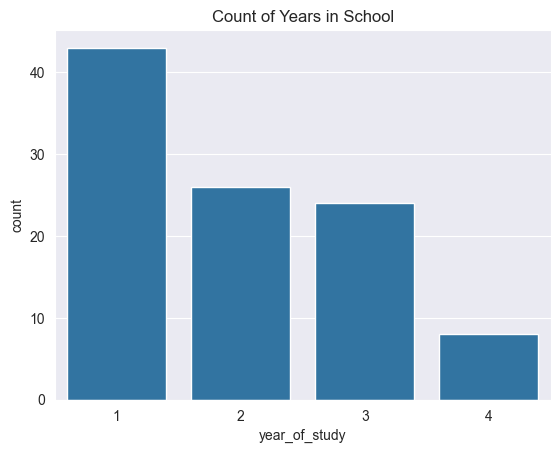

In [93]:
'''
Understand how many students are in year 1,2,3 or 4 of their studies.
'''
sns.countplot(x='year_of_study', data = df).set(title = 'Count of Years in School')
plt.show()

In [94]:
'''
Show the values present for number of students in years 1,2,3, or 4 within the dataset.
'''
df['year_of_study'].value_counts()

year_of_study
1    43
2    26
3    24
4     8
Name: count, dtype: int64

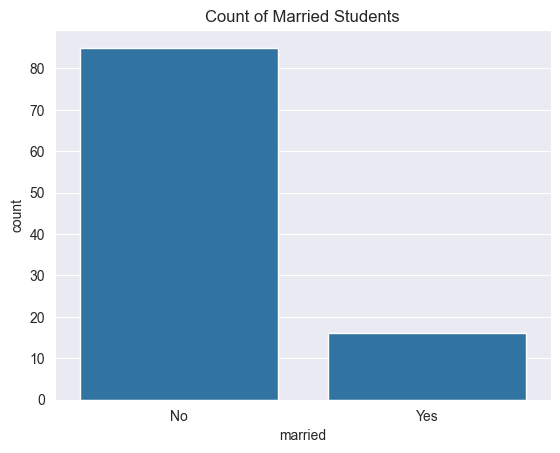

In [95]:
'''
Understand how many students are married.
'''
sns.countplot(x='married', data = df).set(title = 'Count of Married Students')
plt.show()

In [96]:
'''
Show the values present for number of students married within the dataset.
'''
df['married'].value_counts()

married
No     85
Yes    16
Name: count, dtype: int64

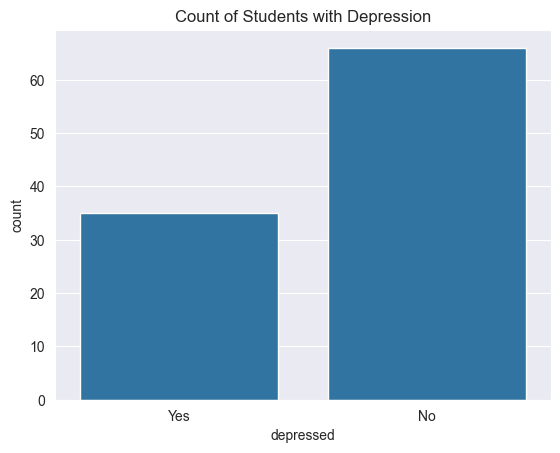

In [97]:
'''
Understand how many students with depression.
'''
sns.countplot(x='depressed', data = df).set(title = 'Count of Students with Depression')
plt.show()

In [98]:
'''
Show the values present for number of depressed students.
'''
df['depressed'].value_counts()

depressed
No     66
Yes    35
Name: count, dtype: int64

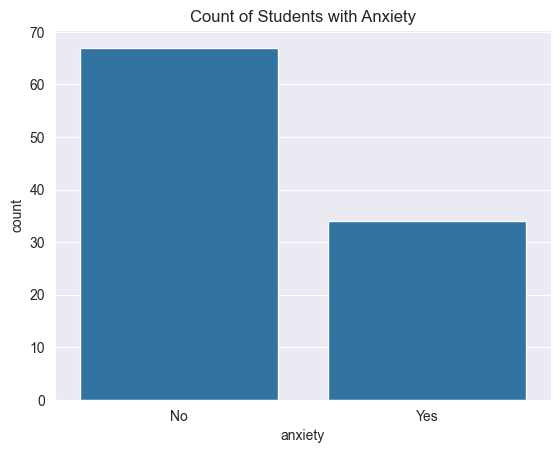

In [99]:
'''
Understand how many students have anxiety.
'''
sns.countplot(x='anxiety', data = df).set(title = 'Count of Students with Anxiety')
plt.show()

In [100]:
'''
Show the values present for number of students with anxiety.
'''
df['anxiety'].value_counts()

anxiety
No     67
Yes    34
Name: count, dtype: int64

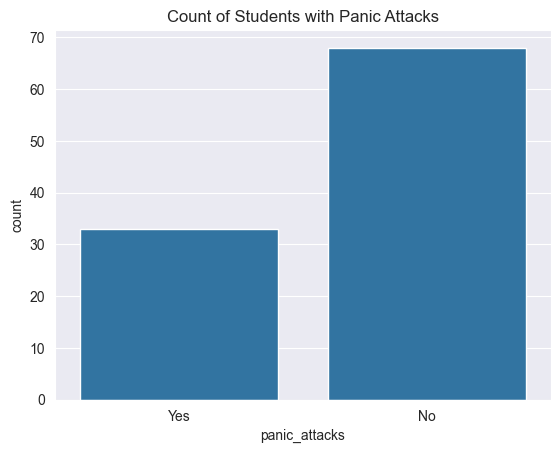

In [101]:
'''
Understand how many students have panic attacks.
'''
sns.countplot(x='panic_attacks', data = df).set(title = 'Count of Students with Panic Attacks')
plt.show()

In [102]:
'''
Show the values present for number of students with panic attacks.
'''
df['panic_attacks'].value_counts()

panic_attacks
No     68
Yes    33
Name: count, dtype: int64

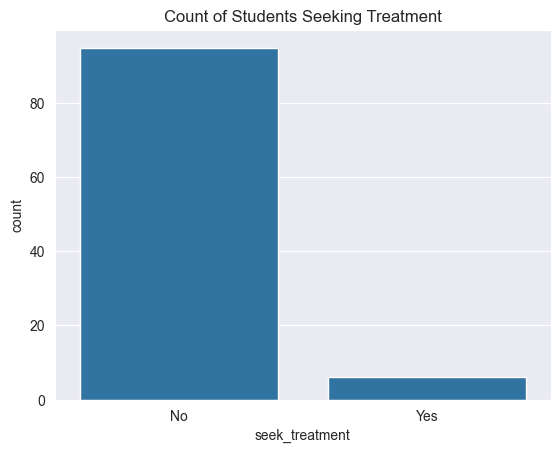

In [103]:
'''
Understand how many students seek treatment
'''
sns.countplot(x='seek_treatment', data = df).set(title = 'Count of Students Seeking Treatment')
plt.show()

In [104]:
'''
Show the values present for number of students seeking treatments.
'''
df['seek_treatment'].value_counts()

seek_treatment
No     95
Yes     6
Name: count, dtype: int64

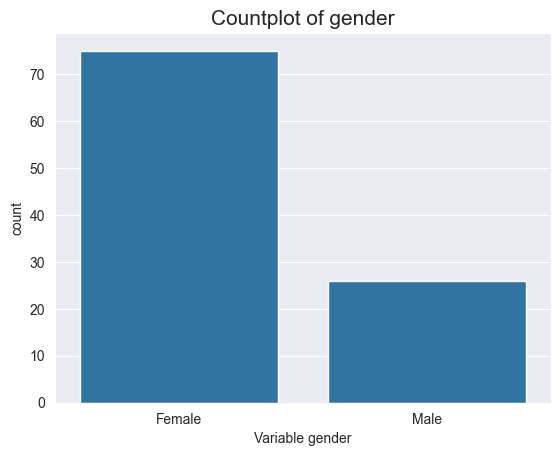

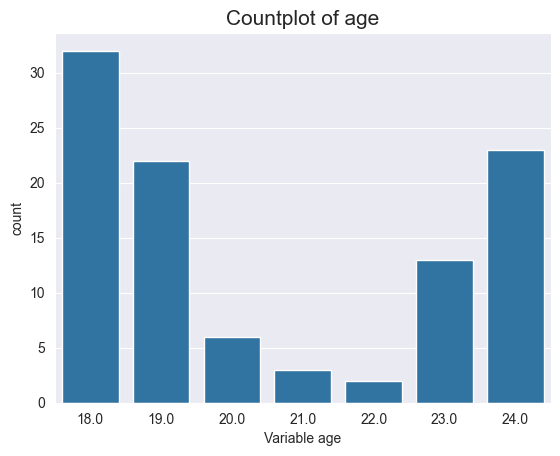

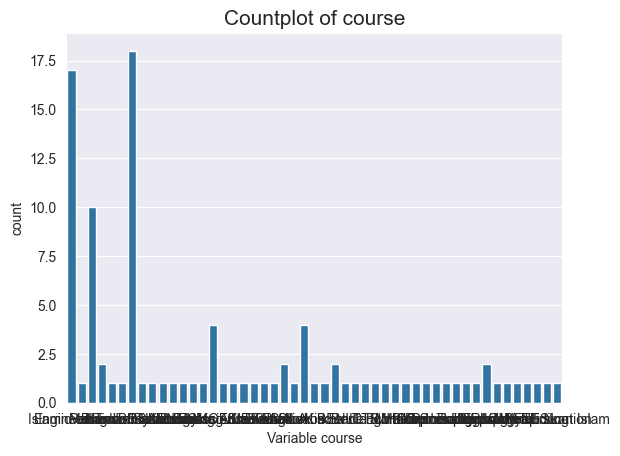

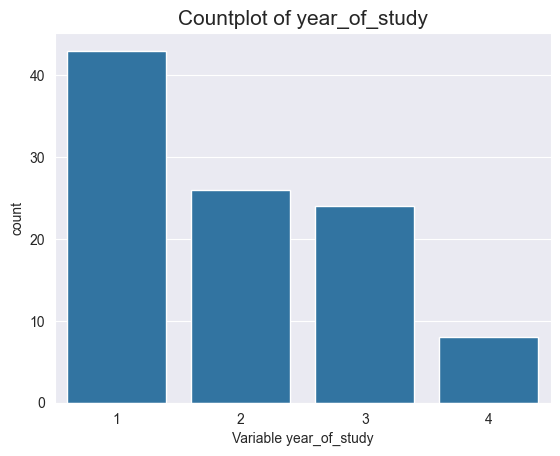

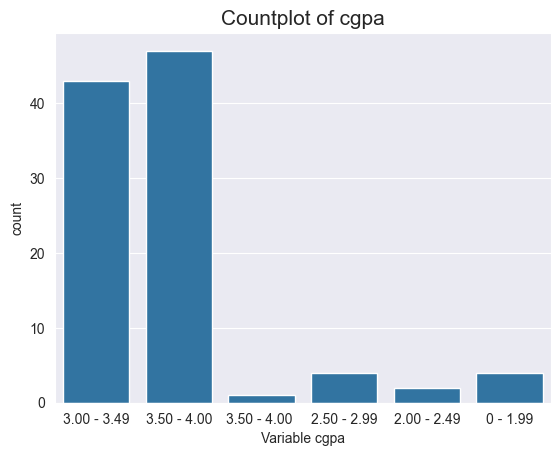

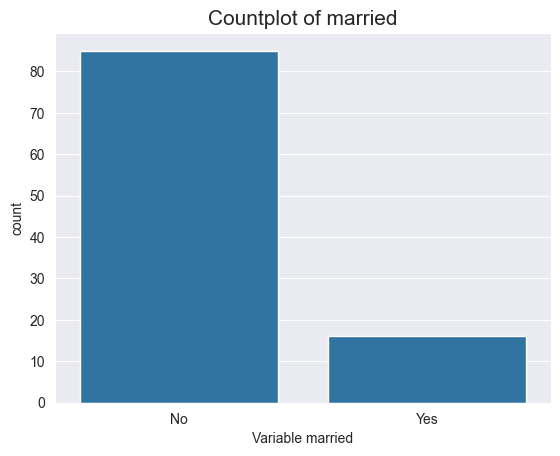

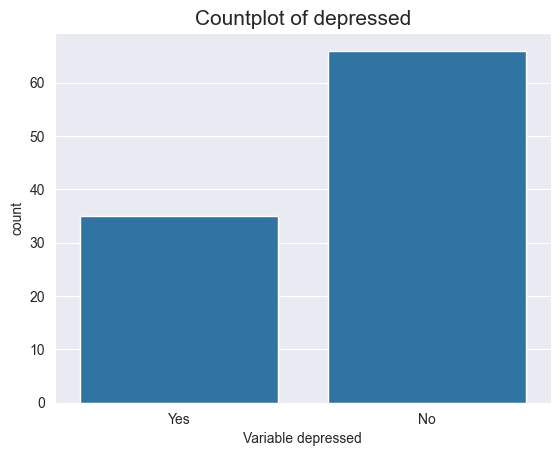

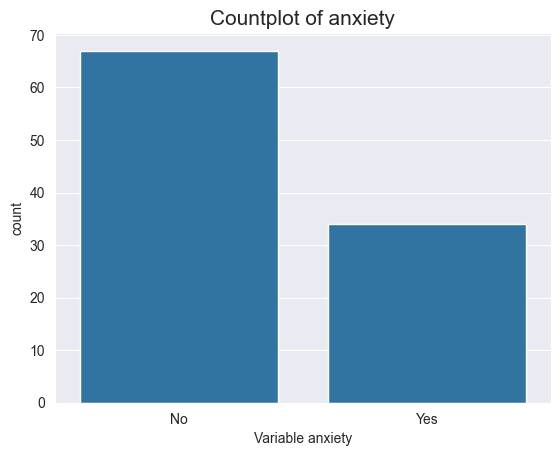

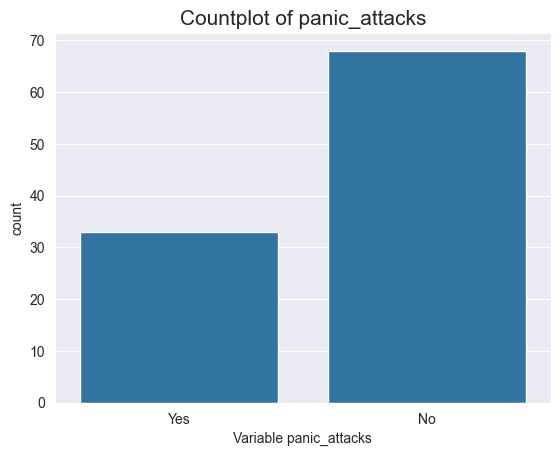

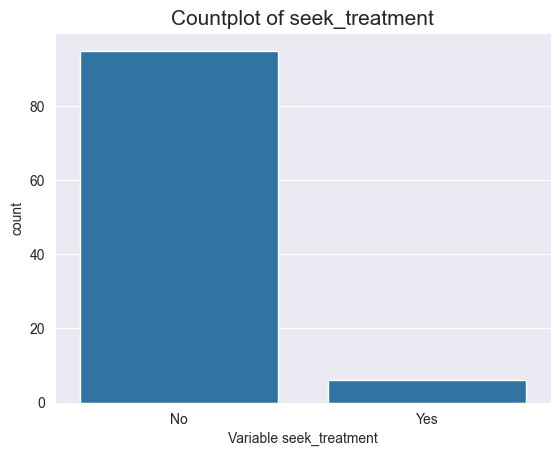

In [105]:
'''
Since ploting all the countplots separately is redundant, this section of the code will try to utilize a for loop to plot
all the histograms for the columns at once.
This code could be used to replace the countplots above in a more efficient manner.
'''
for col in df.columns:
    sns.countplot(x =df[col], data = df) 
    plt.title("Countplot of {}".format(col), fontsize=15) 
    plt.xlabel("Variable " +col, fontsize=10) 
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)
    plt.show()

### 3. Create a box plot from the data.

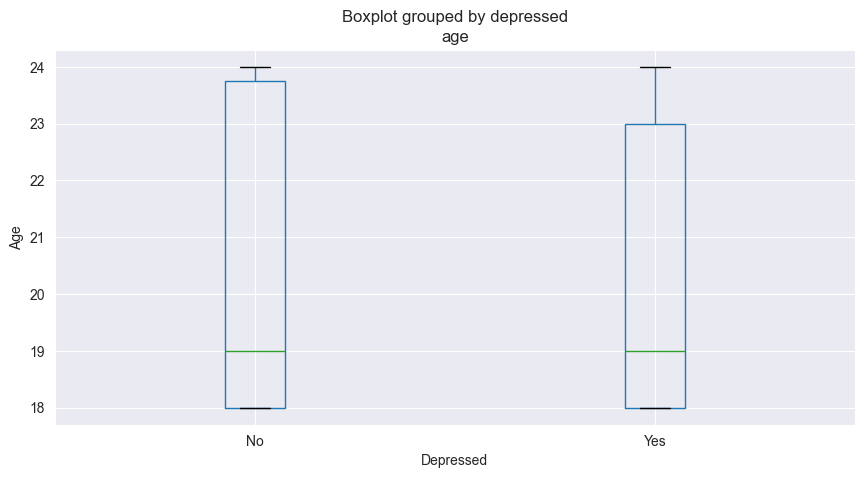

In [106]:
'''
Construct a box plot to understand depression based on age.
'''
df.boxplot(column='age', by='depressed',figsize=(10,5))
plt.xlabel("Depressed", fontsize=10)
plt.ylabel("Age", fontsize=10)
plt.show()

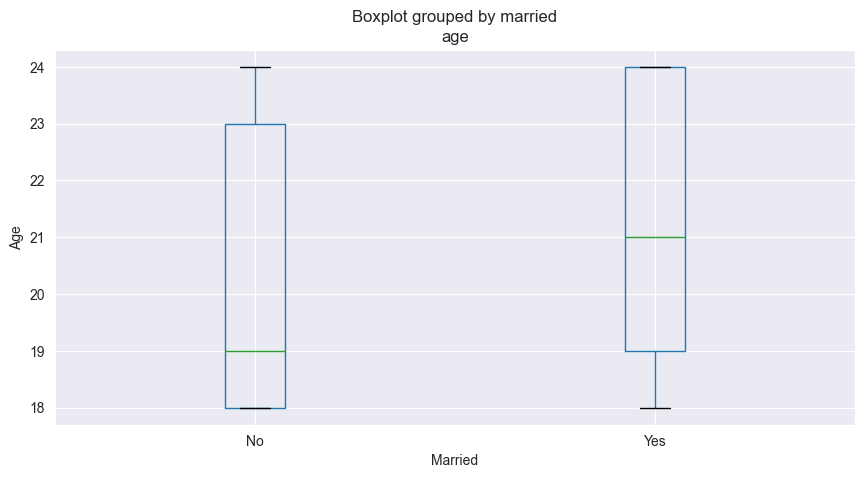

In [107]:
'''
Construct a box plot to understand married students based on age.
'''
df.boxplot(column='age', by='married',figsize=(10,5))
plt.xlabel("Married", fontsize=10)
plt.ylabel("Age", fontsize=10)
plt.show()

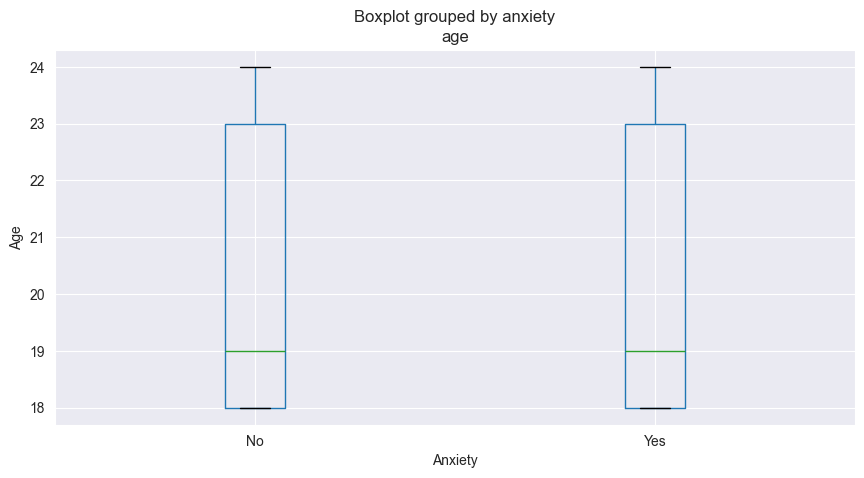

In [108]:
'''
Construct a box plot to understand anxiety based on age.
'''
df.boxplot(column='age', by='anxiety',figsize=(10,5))
plt.xlabel("Anxiety", fontsize=10)
plt.ylabel("Age", fontsize=10)
plt.show()

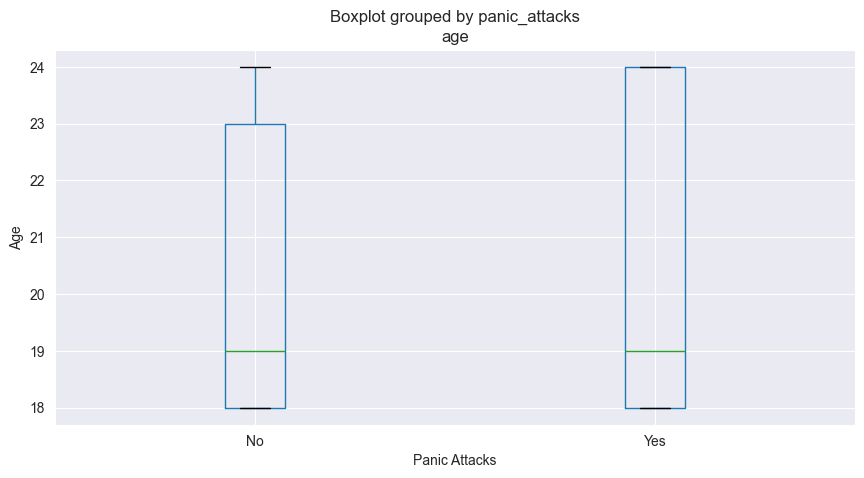

In [109]:
'''
Construct a box plot to understand panic attacks based on age.
'''
df.boxplot(column='age', by='panic_attacks',figsize=(10,5))
plt.xlabel("Panic Attacks", fontsize=10)
plt.ylabel("Age", fontsize=10)
plt.show()

### 4. Create a bivariate plot from the data.

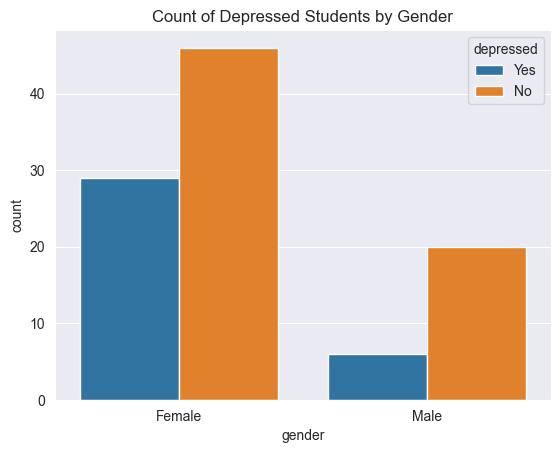

In [110]:
'''
Construct a bivariate countplot for gender and depression.
'''
sns.countplot(x = df['gender'], hue = df['depressed']).set(title = 'Count of Depressed Students by Gender')
plt.show()

In [111]:
'''
Find the count of depressed students by gender.
'''
df.groupby(['depressed','gender'])['age'].count()

depressed  gender
No         Female    46
           Male      20
Yes        Female    29
           Male       6
Name: age, dtype: int64

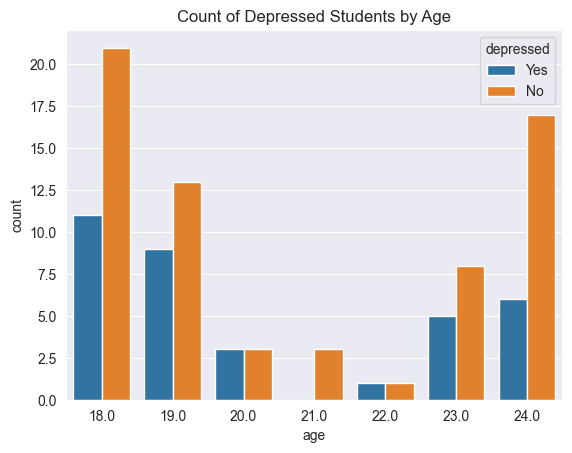

In [112]:
'''
Construct a bivariate countplot for age and depression.
'''
sns.countplot(x = df['age'], hue = df['depressed']).set(title = 'Count of Depressed Students by Age')
plt.show()

In [113]:
'''
Find the count of depressed students by age.
'''
df.groupby(['depressed','age'])['gender'].count()

depressed  age 
No         18.0    21
           19.0    13
           20.0     3
           21.0     3
           22.0     1
           23.0     8
           24.0    17
Yes        18.0    11
           19.0     9
           20.0     3
           22.0     1
           23.0     5
           24.0     6
Name: gender, dtype: int64

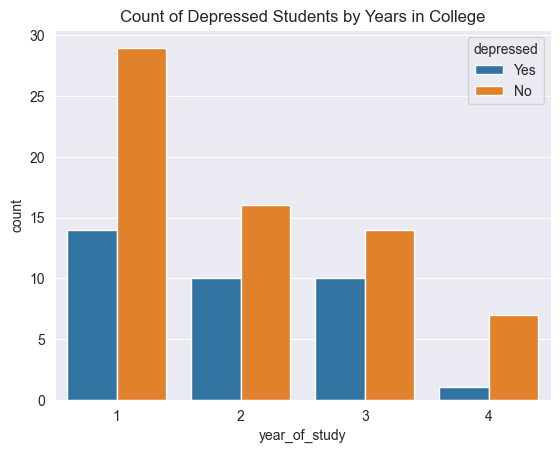

In [114]:
'''
Construct a bivariate countplot for number of years in college and depression.
'''
sns.countplot(x = df['year_of_study'], hue = df['depressed']).set(title = 'Count of Depressed Students by Years in College')
plt.show()

In [115]:
'''
Find the count of depressed students by years in college.
'''
df.groupby(['depressed','year_of_study'])['age'].count()

depressed  year_of_study
No         1                29
           2                16
           3                14
           4                 7
Yes        1                14
           2                10
           3                10
           4                 1
Name: age, dtype: int64

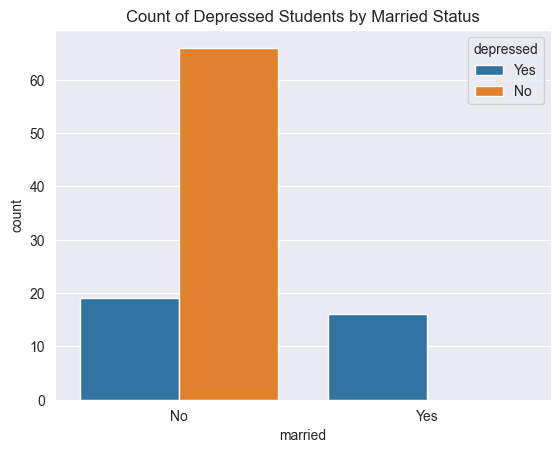

In [116]:
'''
Construct a bivariate countplot for married students and depression.
'''
sns.countplot(x = df['married'], hue = df['depressed']).set(title = 'Count of Depressed Students by Married Status')
plt.show()

In [117]:
'''
Find the count of depressed students by married status.
'''
df.groupby(['depressed','married'])['age'].count()

depressed  married
No         No         66
Yes        No         19
           Yes        16
Name: age, dtype: int64

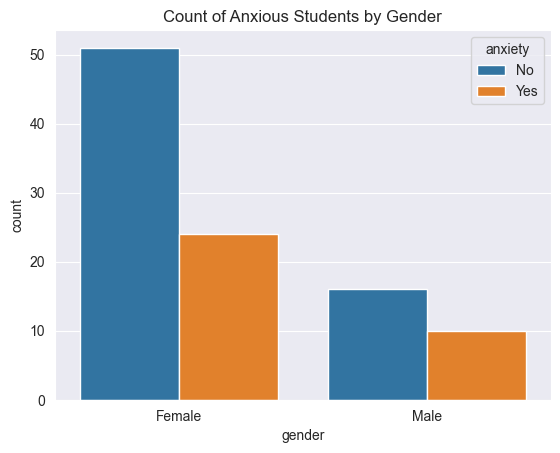

In [118]:
'''
Construct a bivariate countplot for gender and anxiety.
'''
sns.countplot(x = df['gender'], hue = df['anxiety']).set(title = 'Count of Anxious Students by Gender')
plt.show()

In [119]:
'''
Find the count of anxious students by gender.
'''
df.groupby(['anxiety','gender'])['age'].count()

anxiety  gender
No       Female    51
         Male      16
Yes      Female    24
         Male      10
Name: age, dtype: int64

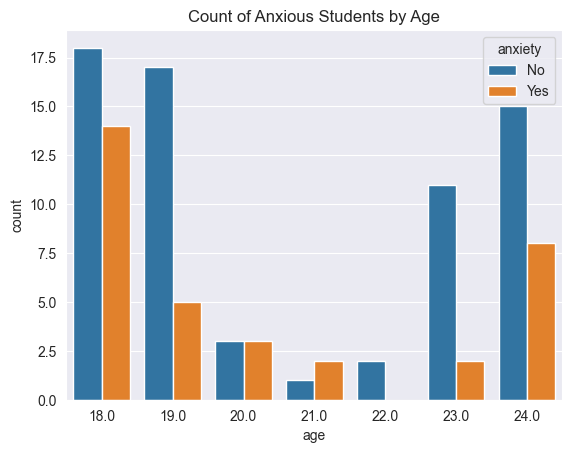

In [120]:
'''
Construct a bivariate countplot for age and anxiety.
'''
sns.countplot(x = df['age'], hue = df['anxiety']).set(title = 'Count of Anxious Students by Age')
plt.show()

In [121]:
'''
Find the count of anxious students by age.
'''
df.groupby(['anxiety','age'])['gender'].count()

anxiety  age 
No       18.0    18
         19.0    17
         20.0     3
         21.0     1
         22.0     2
         23.0    11
         24.0    15
Yes      18.0    14
         19.0     5
         20.0     3
         21.0     2
         23.0     2
         24.0     8
Name: gender, dtype: int64

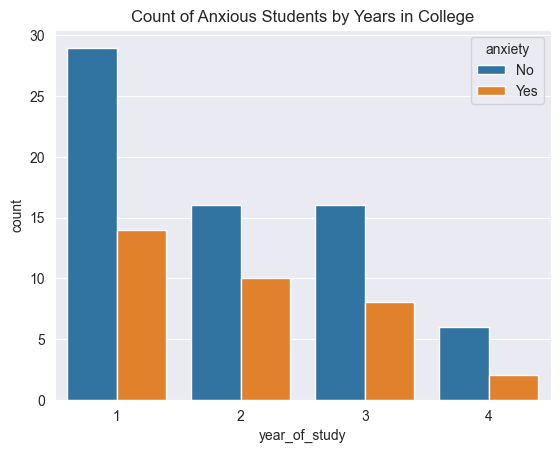

In [122]:
'''
Construct a bivariate countplot for number of years in college and anxiety.
'''
sns.countplot(x = df['year_of_study'], hue = df['anxiety']).set(title = 'Count of Anxious Students by Years in College')
plt.show()

In [123]:
'''
Find the count of anxious students by years in college.
'''
df.groupby(['anxiety','year_of_study'])['age'].count()

anxiety  year_of_study
No       1                29
         2                16
         3                16
         4                 6
Yes      1                14
         2                10
         3                 8
         4                 2
Name: age, dtype: int64

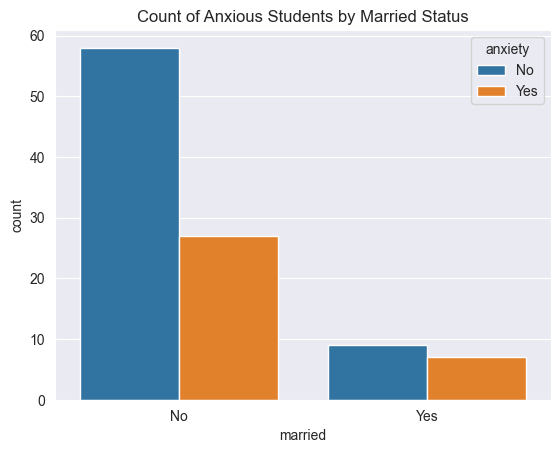

In [124]:
'''
Construct a bivariate countplot for married students and anxiety.
'''
sns.countplot(x = df['married'], hue = df['anxiety']).set(title = 'Count of Anxious Students by Married Status')
plt.show()

In [125]:
'''
Find the count of anxious students by marriage status.
'''
df.groupby(['anxiety','married'])['age'].count()

anxiety  married
No       No         58
         Yes         9
Yes      No         27
         Yes         7
Name: age, dtype: int64

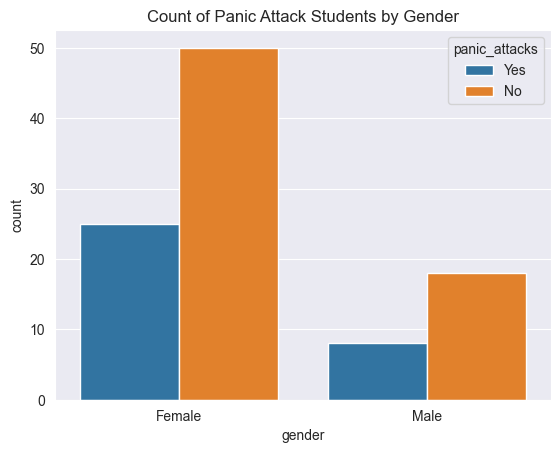

In [126]:
'''
Construct a bivariate countplot for gender and panic attacks.
'''
sns.countplot(x = df['gender'], hue = df['panic_attacks']).set(title = 'Count of Panic Attack Students by Gender')
plt.show()

In [127]:
'''
Find the count of panic attack students by gender.
'''
df.groupby(['panic_attacks','gender'])['age'].count()

panic_attacks  gender
No             Female    50
               Male      18
Yes            Female    25
               Male       8
Name: age, dtype: int64

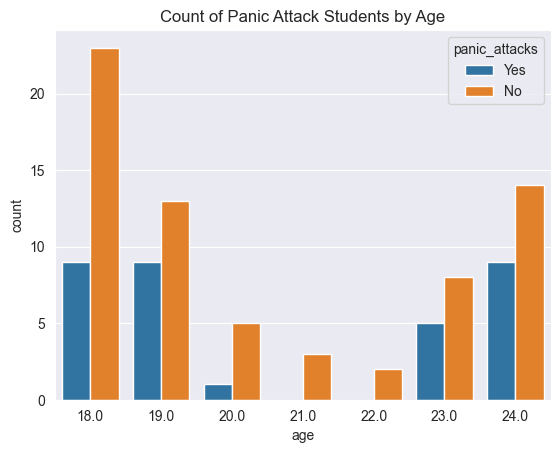

In [128]:
'''
Construct a bivariate countplot for age and panic attacks.
'''
sns.countplot(x = df['age'], hue = df['panic_attacks']).set(title = 'Count of Panic Attack Students by Age')
plt.show()

In [129]:
'''
Find the count of panic attack students by age.
'''
df.groupby(['panic_attacks','age'])['gender'].count()

panic_attacks  age 
No             18.0    23
               19.0    13
               20.0     5
               21.0     3
               22.0     2
               23.0     8
               24.0    14
Yes            18.0     9
               19.0     9
               20.0     1
               23.0     5
               24.0     9
Name: gender, dtype: int64

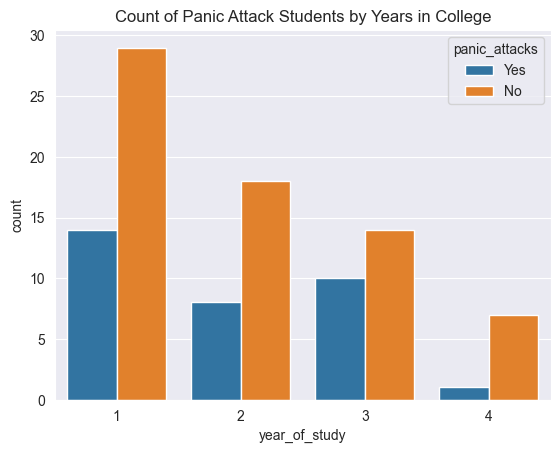

In [130]:
'''
Construct a bivariate countplot for number of years in college and panic attacks.
'''
sns.countplot(x = df['year_of_study'], hue = df['panic_attacks']).set(title = 'Count of Panic Attack Students by Years in College')
plt.show()

In [131]:
'''
Find the count of panic attack students by years in college.
'''
df.groupby(['panic_attacks','year_of_study'])['age'].count()

panic_attacks  year_of_study
No             1                29
               2                18
               3                14
               4                 7
Yes            1                14
               2                 8
               3                10
               4                 1
Name: age, dtype: int64

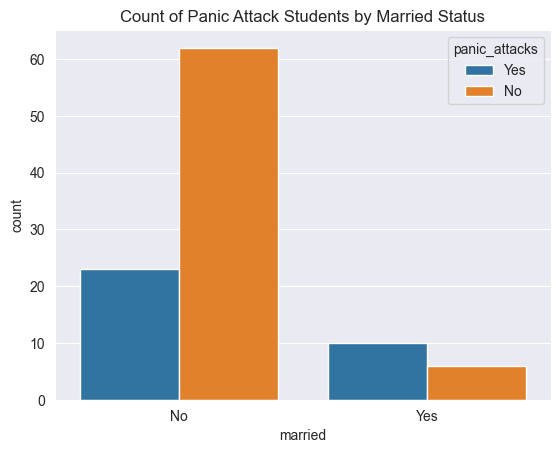

In [132]:
'''
Construct a bivariate countplot for married students and panic attacks.
'''
sns.countplot(x = df['married'], hue = df['panic_attacks']).set(title = 'Count of Panic Attack Students by Married Status')
plt.show()

In [133]:
'''
Find the count of panic attack students by marriage status.
'''
df.groupby(['panic_attacks','married'])['age'].count()

panic_attacks  married
No             No         62
               Yes         6
Yes            No         23
               Yes        10
Name: age, dtype: int64

### 5. Create any additional visualizations that will help answer the questions.

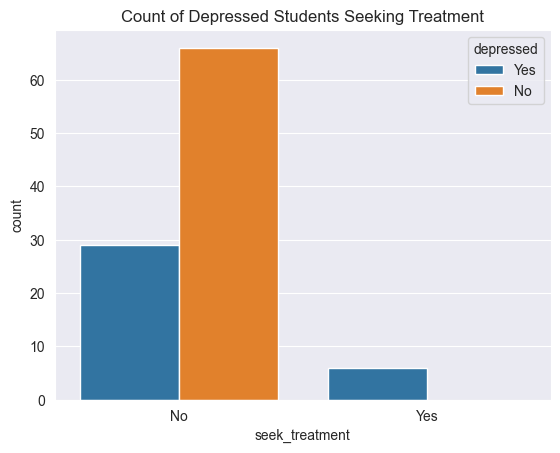

In [134]:
'''
Construct a bivariate countplot for depressed students and treatment seekers.
'''
sns.countplot(x = df['seek_treatment'], hue = df['depressed']).set(title = 'Count of Depressed Students Seeking Treatment')
plt.show()

In [135]:
'''
Find the count of depressed students seeking treatment.
'''
df.groupby(['depressed','seek_treatment'])['age'].count()

depressed  seek_treatment
No         No                66
Yes        No                29
           Yes                6
Name: age, dtype: int64

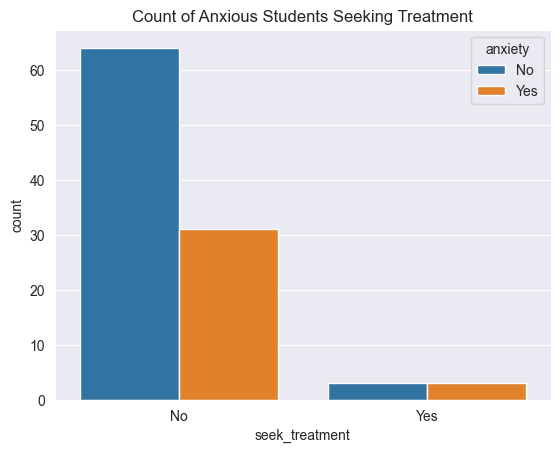

In [136]:
'''
Construct a bivariate countplot for anxious students and treatment seekers.
'''
sns.countplot(x = df['seek_treatment'], hue = df['anxiety']).set(title = 'Count of Anxious Students Seeking Treatment')
plt.show()

In [137]:
'''
Find the count of anxious students seeking treatment.
'''
df.groupby(['anxiety','seek_treatment'])['age'].count()

anxiety  seek_treatment
No       No                64
         Yes                3
Yes      No                31
         Yes                3
Name: age, dtype: int64

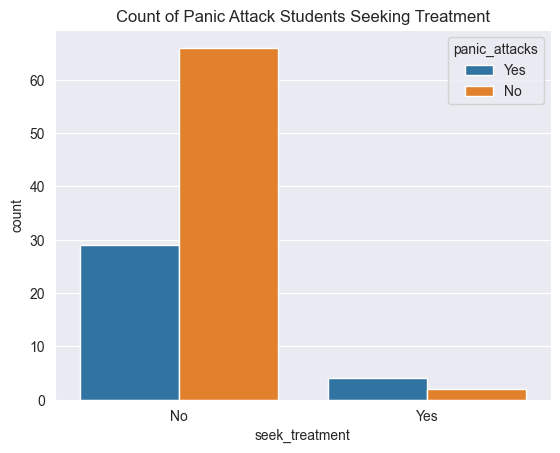

In [138]:
'''
Construct a bivariate countplot for panic attack students and treatment seekers.
'''
sns.countplot(x = df['seek_treatment'], hue = df['panic_attacks']).set(title = 'Count of Panic Attack Students Seeking Treatment')
plt.show()

In [139]:
'''
Find the count of panic attack students seeking treatment.
'''
df.groupby(['panic_attacks','seek_treatment'])['age'].count()

panic_attacks  seek_treatment
No             No                66
               Yes                2
Yes            No                29
               Yes                4
Name: age, dtype: int64

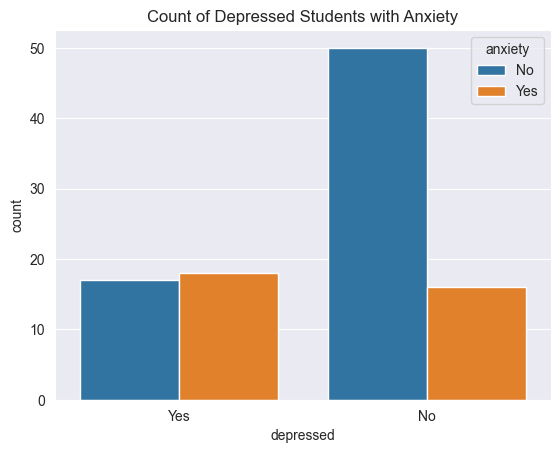

In [140]:
'''
Construct a bivariate countplot for depressed students and anxiety.
'''
sns.countplot(x = df['depressed'], hue = df['anxiety']).set(title = 'Count of Depressed Students with Anxiety')
plt.show()

In [141]:
'''
Find the count of depressed students with anxiety.
'''
df.groupby(['depressed','anxiety'])['age'].count()

depressed  anxiety
No         No         50
           Yes        16
Yes        No         17
           Yes        18
Name: age, dtype: int64

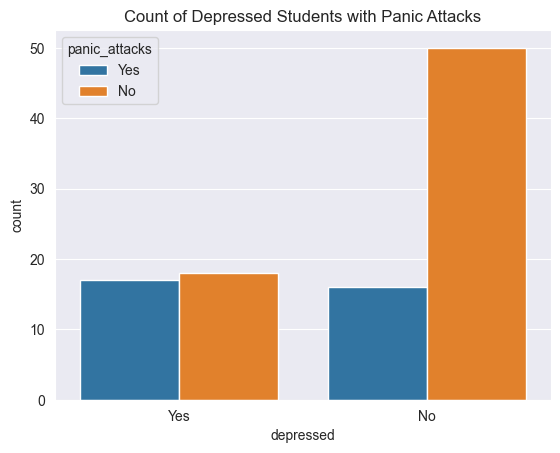

In [142]:
'''
Construct a bivariate countplot for depressed students and panic attacks.
'''
sns.countplot(x = df['depressed'], hue = df['panic_attacks']).set(title = 'Count of Depressed Students with Panic Attacks')
plt.show()

In [143]:
'''
Find the count of depressed students with panic attacks.
'''
df.groupby(['depressed','panic_attacks'])['age'].count()

depressed  panic_attacks
No         No               50
           Yes              16
Yes        No               18
           Yes              17
Name: age, dtype: int64

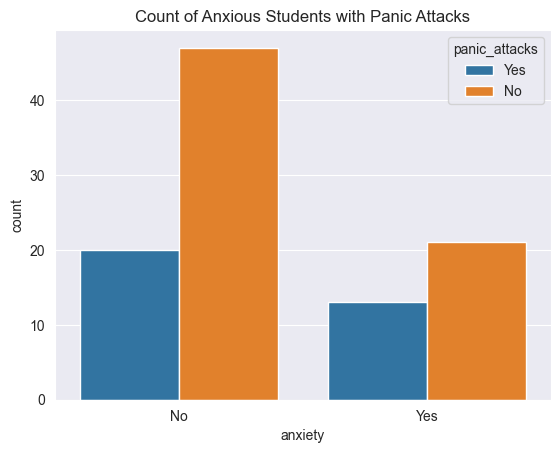

In [144]:
'''
Construct a bivariate countplot for anxiety students and panic attacks.
'''
sns.countplot(x = df['anxiety'], hue = df['panic_attacks']).set(title = 'Count of Anxious Students with Panic Attacks')
plt.show()

In [145]:
'''
Find the count of anxious students with panic attacks.
'''
df.groupby(['anxiety','panic_attacks'])['age'].count()

anxiety  panic_attacks
No       No               47
         Yes              20
Yes      No               21
         Yes              13
Name: age, dtype: int64

In [146]:
'''
Find the count of anxious students with panic attacks.
'''
df.groupby(['depressed', 'anxiety','panic_attacks'])['age'].count()

depressed  anxiety  panic_attacks
No         No       No               37
                    Yes              13
           Yes      No               13
                    Yes               3
Yes        No       No               10
                    Yes               7
           Yes      No                8
                    Yes              10
Name: age, dtype: int64

### 6. Summarize findings and explain how visualizations support findings.

### Summary of findings:
<ul>
    <li> This dataset is not very balanced. It shall be noted this dataset consists of 75 females and 26 males between the ages of 18-24 years old. Majority of students were in the first year of their college program (43%) and the least amount of students were in the last year of their college program (8%). The remaining 49% were in their second year (26%) or third year of college (23%). From the students surveyed, roughly 84% were not married. Of the students surveyed, 35 of the 101 students did have depression. There were 34 of the 101 students with anxiety. Lastly, there were 33 of the 101 students that experience panic attacks. All of these statements are shown in the univariate countplots from Section 2 above. An improvement for future studies would be to expand on the surveyed data to obtain more datapoints for better balance. Based on the dataset provided, I'll highlight the findings for the questions posted in Section 1. 
    <li> Majority of the students with depression were female (83%). Of the 35 students with depression, 29 of them were female. Same trend held true for anxiety and panic attacks. Of the 34 students with anxiety, 24 of them were female (71%). Of the 33 students with panic attacks, 25 of them were female (76%). The bivariate charts in Section 4 illustrate these findings from the dataset.Since this dataset is biased with more female students compared to male, we cannot definitively draw conclusions for gender influence on depression.   
    <li> Over half of the students that were depressed were 18 or 19 years of age (57%). About 42% of the students with anxiety were 18 years old. For panic attacks, 82% of students were 18, 19, or 24 years old. All of these findings are portrayed from the bivariate countplots in Section 4. 
    <li> All but one student that was depressed were in years 1-3 of their college career. The same finding holds true for panic attacks. For anxiety, all but two students were in years 1-3 of their college career. 
    <li> Interestingly, all the depressed students within this survey were married. Only 7 of the 34 students with anxiety were married (21%). There were 10 of 33 students with panic attacks that were married (30%). All of these findings are portrayed in the bivariate countplots in Section 5. 
    <li> For the 35 individuals with depression, 18 of them also have anxiety. Similarly, 17 of the depressed individuals also have panic attacks. Of the 35 individuals with depression, 10 students have both anxiety and panic attacks as well. These findings can also be found in the bivariate countplots in Section 5.
    <li> For depressed students, only 6 students (17%) are seeking treatment. For anxious students, 3 students (9%) are seeking treatment. Interestingly, there are 3 of 67 (4%) students that claim to not have anxiety, but are still seeking treatment. For panic attack students, 4 students (12%) are seeking treatment. Interestingly, there are 2 of 68 (3%) students that claim to not have panic attacks, but are still seeking treatment. For any of these mental health issues, not nearly enough students are seeking the help they need. All of these findings are illustrated in the bivariate countplots in Section 5.
    <li> To summarize, additional data collection would be recommended prior to forming any conclusions for mental health analysis. There were some interesting findings within this dataset. Females tended to have higher counts of depression, anxiety, and panic attacks compared to males. This may be due to the inbalance present for gender within the dataset. Students with any of the mental health issues appeared to be closer to 18 or 19 year of age and within the first three years of their college careers. For individuals with depression, almost half of the students also had another mental health issue. In addition, a third of the folks with depression also had anxiety and panic attacks. Only about 17% of the students with depression are seeking the treatment needed (it is even lower for anxiety and panic attacks). This percentage needs to drastically increase to ensure our student's mental health concerns are improved.
<ul>